In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
housing_csv = pd.read_csv("housing.csv")

housing_csv

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# This line of code prints the head of the dataset
housing_csv.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# This line of code prints the info of the dataset
housing_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# This line of code prints the shape of the dataset
housing_csv.shape

(20640, 10)

In [ ]:
# This line of code prints the types of the datase
print(housing_csv.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [ ]:
# This line of code checks for missing values in a DataFrame 'df' and calculates the sum of missing values for each column.
# The function 'isnull()' is used to create a boolean mask where 'True' represents a missing value, and 'False' represents a valid value.
# The 'sum()' function is then applied on this boolean mask to count the number of 'True' values (i.e., missing values) in each column.
# The result is a Series that contains the count of missing values for each column in the DataFrame 'df'.
housing_csv.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
housing_csv['total_bedrooms'] = housing_csv['total_bedrooms'].fillna(housing_csv['total_bedrooms'].mean())

In [ ]:
housing_csv = pd.get_dummies(housing_csv, columns=['ocean_proximity'], drop_first=True)

In [ ]:
# This line of code prints the columns of the dataset
print(housing_csv.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [ ]:

# Redefine Features and Target
X = housing_csv.drop('median_house_value', axis=1)  # Features
y = housing_csv['median_house_value']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.coef_

array([-2.68382734e+04, -2.54683520e+04,  1.10218508e+03, -6.02150567e+00,
        1.02789395e+02, -3.81729064e+01,  4.82527528e+01,  3.94739752e+04,
       -3.97866562e+04,  1.36125073e+05, -5.13664222e+03,  3.43114007e+03])

In [ ]:
median_income = housing_csv['median_income'].median()
print(f"Median Income: {median_income}")

Median Income: 3.5347999999999997


In [ ]:
total_population = housing_csv['population'].sum()
print(f"Total Population: {total_population}")

Total Population: 29421840.0


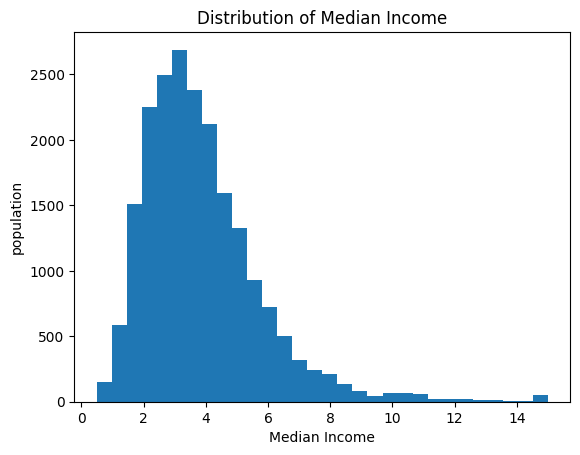

In [ ]:
# Assuming 'median_income' is the column name in your DataFrame
plt.hist(housing_csv['median_income'], bins=30)
plt.xlabel("Median Income")
plt.ylabel("population")
plt.title("Distribution of Median Income")
plt.show()

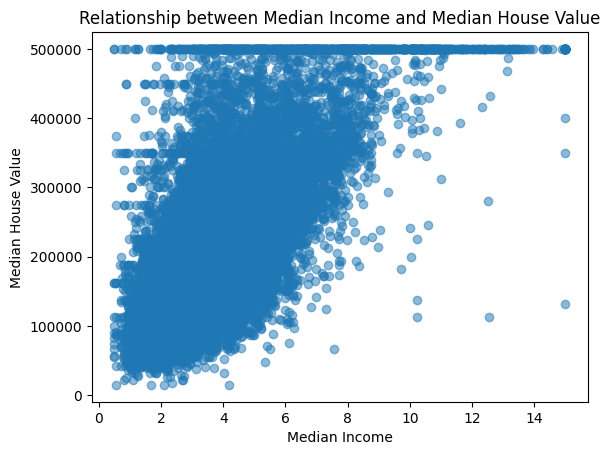

In [ ]:
plt.scatter(housing_csv['median_income'], housing_csv['median_house_value'], alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Relationship between Median Income and Median House Value")
plt.show()